In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [13]:
df = pd.read_csv('../data/allinone.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/allinone.csv'

### Manejo de Valores Nulos

In [10]:
df.isnull().sum()

Unnamed: 0                 0
 Destination Port          0
 Flow Duration             0
 Total Fwd Packets         0
 Total Backward Packets    0
                          ..
Idle Mean                  0
 Idle Std                  0
 Idle Max                  0
 Idle Min                  0
 Label                     0
Length: 80, dtype: int64

In [54]:
# Eliminamos las columnas con >50% de valores nulos 

umbral = len(df) * 0.5 
df = df.dropna(thresh=umbral, axis=1) 

In [12]:
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='mean')  # Corregido el nombre de la variable

col_num = df.select_dtypes(include=['int64', 'float64']).columns  # Seleccionamos columnas numéricas

df[col_num] = imputer_num.fit_transform(df[col_num])  # Aplicamos la imputación correctamente

NameError: name 'df' is not defined

In [84]:
# Imputación para columnas categóricas 
imputer_cat = SimpleImputer(strategy='most_frequent') 

col_cat = df[[df.select_dtypes(include=['category', 'object', 'bool'])]].columns

df[[]]=imputer_cat.fit_transform(col_cat)

ValueError: 3

In [59]:
# Eliminar filas con nulos residuales 

df = df.dropna() 

###  CORREGIR INCONSISTENCIAS 

In [61]:
# Estandarizar formatos en columnas categóricas (texto en minúsculas) 

df['col_cat']=df['col_cat'].str.lower().str.strip() 

KeyError: 'col_cat'

In [62]:
# Eliminar duplicados 

df=df.drop_duplicates() 

### MANEJO DE OUTLIERS 

TypeError: Invalid object type at position 0

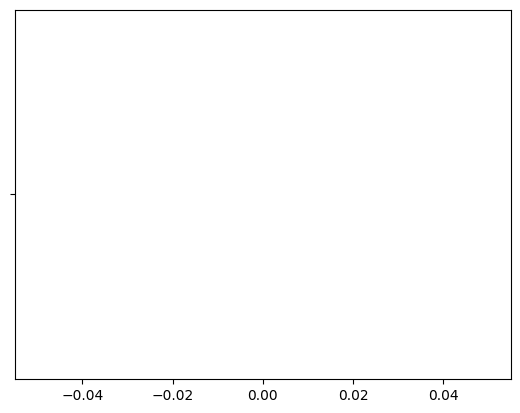

In [ ]:
# Visualización con Boxplots 
sns.boxplot(x=col_num)
plt.show() 

In [ ]:
# Método con Cuantiles para la detección de outliers 
Q1 = col_num.quantile(0.25) 
Q3 = col_num.quantile(0.75) 
IQR = Q3 - Q1
df=df[~((col_num<(Q1-1.5*IQR))|(col_num>(Q3+1.5*IQR)))] 

AttributeError: 'list' object has no attribute 'quantile'

### NORMALIZACIÓN/ESTANDARIZACIÓN DE LOS DATOS 

In [ ]:
# Seleccionar columnas numéricas 
numeric_cols = df.select_dtypes(include=[np.number]).columns 

In [ ]:
# Estandarización (media = 0 desviación = 1) 

scaler = StandardScaler() 
df[numeric_cols] = scaler.fit_transform(df[numeric_cols]) 

### CODIFICACIÓN DE VARIABLES CATEGÓRICAS 

In [ ]:
# Identificar primero variables categóricas 

print(df.dtypes) 

for col in df.select_dtypes(include=['object']).columns: 
    		print(f"{col}: {df[col].nunique()} valores únicos") 

In [ ]:
# Codificación ordinal para categrorías con orden 

le = LabelEncoder() 
df['columna_ordinal'] = le.fit_transform(df['columna_ordinal']) 
 

In [ ]:
# One-Hot Enccoding para categorías sin orden 

df=pd.get_dummies(df,columns=['columna_categorica'],drop_first=True) 

### GUARDAR DATOS LIMPIOS EN CSV 

In [ ]:
df.to_csv(‘datos_limpios.csv’, index=false)